In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/who-is-the-real-winner/sample_submission.csv
/kaggle/input/who-is-the-real-winner/train.csv
/kaggle/input/who-is-the-real-winner/test.csv


In [2]:
real_winner = pd.read_csv('/kaggle/input/who-is-the-real-winner/train.csv')
real_winner.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass


In [3]:
test = pd.read_csv('/kaggle/input/who-is-the-real-winner/test.csv')
test.head()
submission = pd.DataFrame(columns=['ID','Education'])
submission['ID']=test['ID']

In [4]:
sample = pd.read_csv('/kaggle/input/who-is-the-real-winner/sample_submission.csv')
sample

,ID,Education
0,0,Graduate Professional
1,1,12th Pass
2,2,Graduate Professional
3,3,12th Pass
4,4,Graduate Professional


In [5]:
features = ['Party','Criminal Case','state']
X = real_winner[features]

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
y = real_winner.Education
y.unique()
Org = y.copy()

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])
X        

/tmp/ipykernel_18/309213338.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
/tmp/ipykernel_18/309213338.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])


,Party,Criminal Case,state
0,7,4,23
1,4,0,13
2,8,0,11
3,4,0,3
4,4,2,27
...,...,...,...
2054,5,1,12
2055,8,0,21
2056,4,0,25
2057,13,1,14


In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state= 52)
model.fit(X,y)

RandomForestClassifier(random_state=52)

In [9]:
print(X.head())
print(model.predict(X).astype(int))

   Party  Criminal Case  state
0      7              4     23
1      4              0     13
2      8              0     11
3      4              0      3
4      4              2     27
[3 1 5 ... 9 9 5]


In [10]:
from sklearn.metrics import mean_absolute_error
predicted_ed = model.predict(X).astype(int)
mean_absolute_error(y, predicted_ed)

2.3997085964060223

In [11]:
test.head()


,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,2,70 Crore+,11 Crore+,MAHARASHTRA
1,1,Becharam Manna,SINGUR,AITC,1,2 Crore+,13 Lac+,WEST BENGAL
2,2,Sunil Vijay Tingre,VADGAON SHERI,NCP,3,49 Crore+,1 Crore+,MAHARASHTRA
3,3,Asit Mazumder (Tapan),CHUNCHURA,AITC,1,2 Crore+,0,WEST BENGAL
4,4,Hriday Narayan Singh Patel,SAGRI,SP,0,16 Crore+,2 Crore+,UTTAR PRADESH


In [12]:
tt = test.copy()
tt.drop('Candidate',axis=1,inplace=True)
tt.drop('Constituency ∇',axis=1,inplace=True)
tt.drop('ID',axis=1,inplace=True)
tt.drop('Liabilities',axis=1,inplace=True)
tt.drop('Total Assets',axis=1,inplace=True)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
for column in tt.columns:
    if tt[column].dtype == 'object':
        tt[column] = label_encoder.fit_transform(tt[column])
predicted_ed = model.predict(tt).astype(int)

In [13]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Org)
submission['Education'] = label_encoder.inverse_transform(predicted_ed)
submission

,ID,Education
0,0,12th Pass
1,1,Post Graduate
2,2,Graduate
3,3,Post Graduate
4,4,Post Graduate
...,...,...
1369,1369,Post Graduate
1370,1370,Graduate Professional
1371,1371,Graduate Professional
1372,1372,12th Pass


In [14]:

submission.to_csv('/kaggle/working/submission.csv', index=False)

In [15]:
real_winner

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass
...,...,...,...,...,...,...,...,...,...
2054,2054,V. Sasi,CHIRAYINKEEZHU,CPI,1,61 Lac+,10 Lac+,KERALA,Graduate Professional
2055,2055,Pushkar Lal Dangi,MAVLI,INC,0,2 Crore+,8 Lac+,RAJASTHAN,10th Pass
2056,2056,Dr. Manju Shiwach,MODI NAGAR,BJP,0,13 Crore+,85 Lac+,UTTAR PRADESH,Graduate
2057,2057,Mansing Fattesingrao Naik,SHIRALA,NCP,1,25 Crore+,94 Lac+,MAHARASHTRA,12th Pass


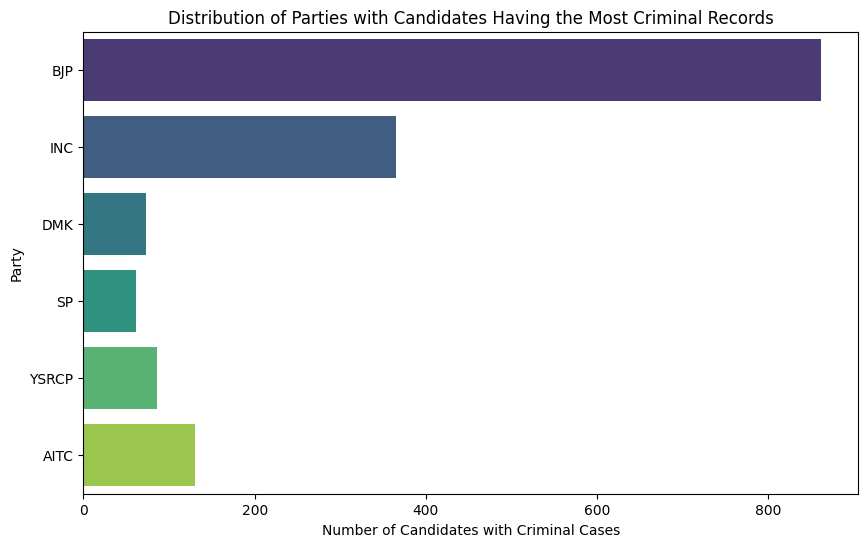

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
party_crime_counts = real_winner.groupby('Party')['Criminal Case'].sum().reset_index()
party_crime_counts_sorted = party_crime_counts.sort_values(by='Criminal Case', ascending=False)
top_parties = party_crime_counts_sorted.head(6)['Party'].tolist()
top_parties_data = real_winner[real_winner['Party'].isin(top_parties)]
plt.figure(figsize=(10, 6))
sns.countplot(y='Party', data=top_parties_data, order=top_parties, palette='viridis')
plt.xlabel('Number of Candidates with Criminal Cases')
plt.ylabel('Party')
plt.title('Distribution of Parties with Candidates Having the Most Criminal Records')
plt.show()


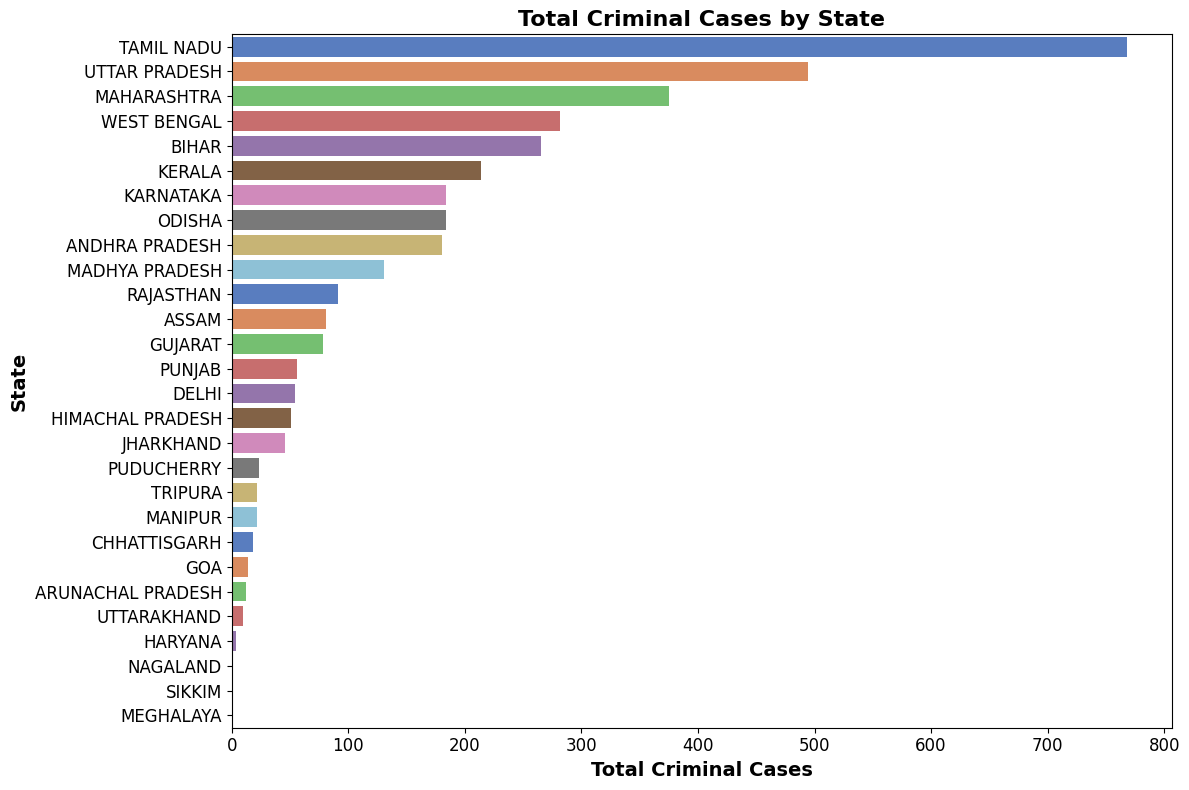

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
state_crime_counts = real_winner.groupby('state')['Criminal Case'].sum().reset_index()

state_crime_counts_sorted = state_crime_counts.sort_values(by='Criminal Case', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Criminal Case', y='state', data=state_crime_counts_sorted, palette='muted')

plt.xlabel('Total Criminal Cases', fontsize=14, fontweight='bold')
plt.ylabel('State', fontsize=14, fontweight='bold')
plt.title('Total Criminal Cases by State', fontsize=16, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()  
plt.show()


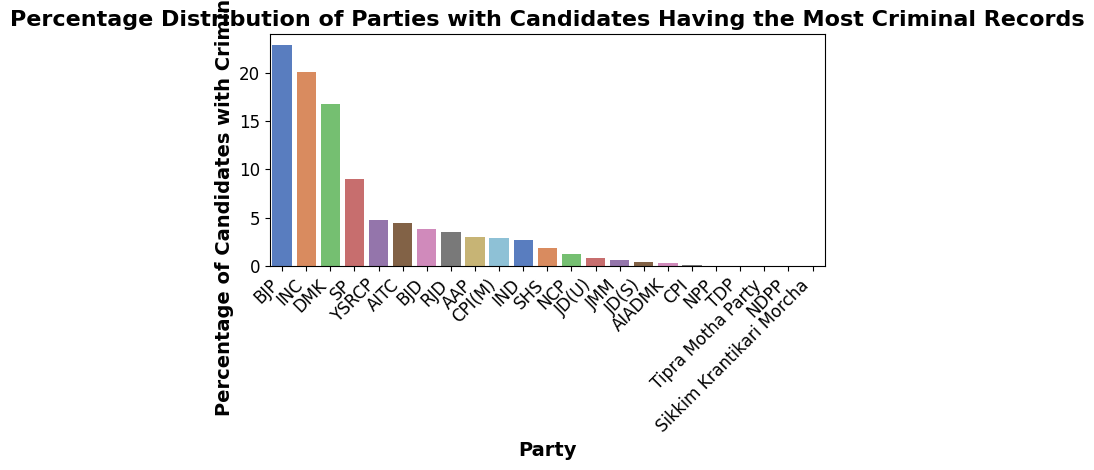

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

party_crime_counts = real_winner.groupby('Party')['Criminal Case'].sum().reset_index()

party_crime_counts_sorted = party_crime_counts.sort_values(by='Criminal Case', ascending=False)

total_candidates_with_crime = party_crime_counts_sorted['Criminal Case'].sum()

party_crime_counts_sorted['Percentage'] = (party_crime_counts_sorted['Criminal Case'] / total_candidates_with_crime) * 100


sns.barplot(x='Party', y='Percentage', data=party_crime_counts_sorted, palette='muted') 


plt.xlabel('Party', fontsize=14, fontweight='bold') 
plt.ylabel('Percentage of Candidates with Criminal Records', fontsize=14, fontweight='bold') 
plt.title('Percentage Distribution of Parties with Candidates Having the Most Criminal Records', fontsize=16, fontweight='bold') 
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12) 
plt.tight_layout()  
plt.show()


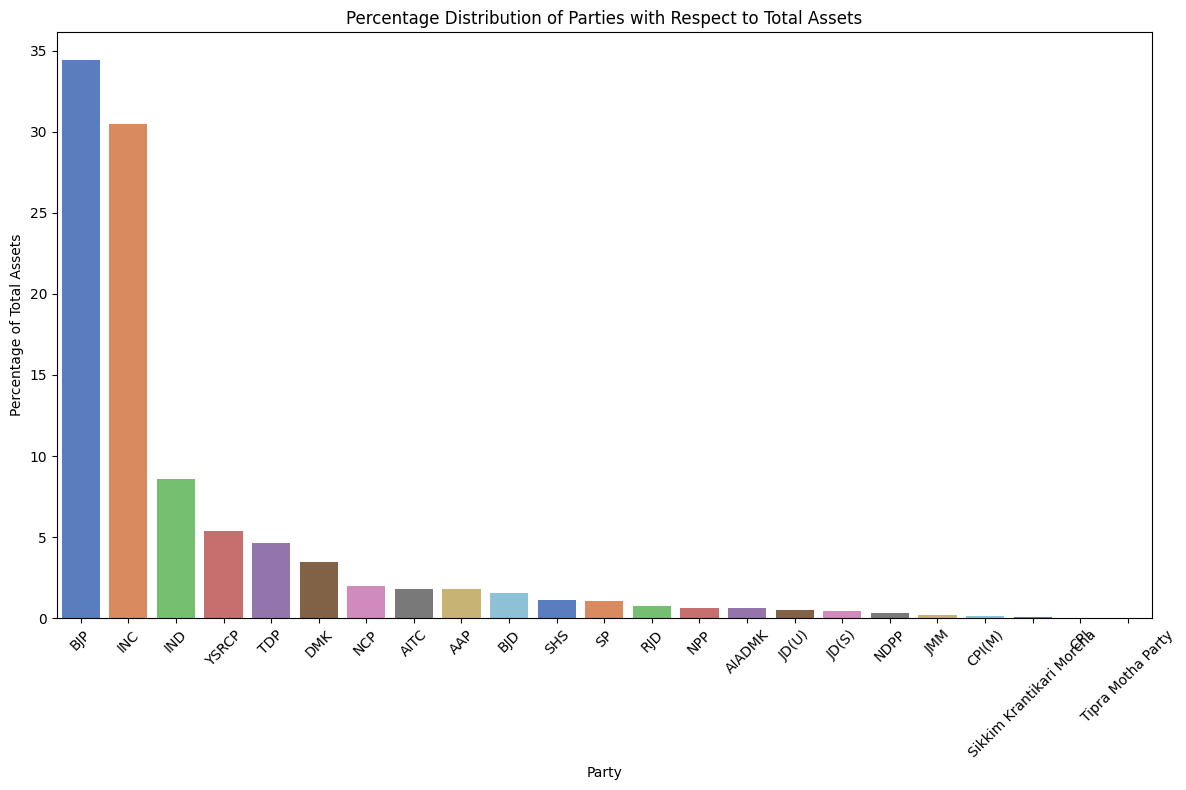

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def convert_assets(assets_str):
    if isinstance(assets_str, float):
        return assets_str
    elif 'Crore+' in assets_str:
        return float(assets_str.replace(' Crore+', '')) * 10000000
    elif 'Lac+' in assets_str:
        return float(assets_str.replace(' Lac+', '')) * 100000  
    elif 'Thou+' in assets_str:
        return float(assets_str.replace(' Thou+', '')) * 100000  
    else:
        return float(assets_str) 
real_winner['Total Assets'] = real_winner['Total Assets'].apply(convert_assets)

party_assets = real_winner.groupby('Party')['Total Assets'].sum().reset_index()

total_assets_all_parties = party_assets['Total Assets'].sum()

party_assets['Percentage'] = (party_assets['Total Assets'] / total_assets_all_parties) * 100

party_assets_sorted = party_assets.sort_values(by='Percentage', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Party', y='Percentage', data=party_assets_sorted, palette='muted')
plt.xlabel('Party')
plt.ylabel('Percentage of Total Assets')
plt.title('Percentage Distribution of Parties with Respect to Total Assets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
